In [1]:
import pandas as pd 
from collections import Counter
import numpy as np

In [16]:
df = pd.read_csv('out.csv',index_col=0)
feedback = df[[col for col in df.columns if "feedback" in col]]
feedback

,feedback-fq5,feedback-fq6,feedback-fq7,feedback-fq8,feedback-fq9,feedback-fq1,feedback-fq2,feedback-fq4
p_325,3,2.0,1,2,3,hovering over nodes to see where to go next wh...,no,i hated the first style. the globe and flat st...
p_328,5,1.0,2,2,2,The hover ability was most valuable for all th...,No,The second visualization technique was particu...
p_329,4,1.0,1,4,2,NaN,NaN,NaN
p_330,2,1.0,1,2,2,I highlighted and then counted each node's con...,Not really,NaN
p_335,2,1.0,1,2,1,Click teeth while counting to have have rhythm...,Struggled at first with the ORANGE nodes conne...,"The tower shield shape was my favorite shape, ..."
p_336,3,1.0,1,3,2,NaN,NaN,NaN
p_337,4,1.0,2,3,3,- centering to the nodes of interest\n- zoomin...,- in several cases there were pairs of edges d...,NaN
p_338,4,5.0,1,2,2,"For shortest path questions, I hovered over bo...",There were two main challenges. On every visua...,"The last style was visually fun, but less intu..."
p_339,3,1.0,1,2,3,"Find the point, then use the hover to determin...",No,I am an idiot and some of the neighbor node qu...
p_341,3,1.0,1,3,2,greedy,NaN,the special node should also change color.


In [17]:
familiarity = df["feedback-fq5"]
fam_mapping = {1: "completely new", 2: "Have seen them once or twice", 3: "Discussed in coursework", 4: "Use them for work", 5: "Expert"}
fam_map = lambda val: fam_mapping[val]
gender = df["feedback-fq6"]
gender_map = lambda val: "Man" if val == 1 else "Woman" if val == 2 else "Non-binary" if val == 3 else "Other" if val == 4 else "Prefer not to say"
age = df["feedback-fq7"]
age_mapping = {1: "18-35", 2: "36-55", 3: "56-75", 4: "75+", 5: "Prefer not to say"}
age_map = lambda val: age_mapping[val]

In [18]:
def report_percentage(vals, mapping):
    new_vals = vals.apply(lambda val: mapping(val)).fillna(5)
    percen_dict = {key: val / len(new_vals) for key, val in dict(Counter(new_vals.to_numpy())).items()}
    print(sum(percen_dict.values()))
    for key, val in percen_dict.items():
        print(key, f"{val:.3f}")

In [19]:
report_percentage(familiarity, fam_map)

1.0000000000000002
Discussed in coursework 0.345
Expert 0.172
Use them for work 0.310
Have seen them once or twice 0.069
completely new 0.103


In [20]:
report_percentage(gender, gender_map)

1.0
Woman 0.103
Man 0.793
Prefer not to say 0.103


In [21]:
report_percentage(age, age_map)

1.0
18-35 0.862
36-55 0.138


In [161]:
no_experience = df[df['feedback-fq5'] <= 2 ]
len(no_experience)

15

In [162]:
experience = df[df['feedback-fq5'] >= 4]
len(experience)

14

In [163]:
def get_df_analysis(data, analysis_type):
    e_cols = [col for col in data.columns if f"{analysis_type}_E" in col]
    h_cols = [col for col in data.columns if f"{analysis_type}_H" in col]
    s_cols = [col for col in data.columns if f"{analysis_type}_S" in col]

    e_times = data[e_cols].mean(axis=1) #/ 1000
    h_times = data[h_cols].mean(axis=1) #/ 1000
    s_times = data[s_cols].mean(axis=1) #/ 1000

    H2 = pd.DataFrame()
    H2["E"] = e_times 
    H2["H"] = h_times 
    H2["S"] = s_times 
    return H2

In [164]:
import scipy.stats as st
import pylab as plt
analysis_type = "correct"
low_exp = get_df_analysis(no_experience, analysis_type)
high_exp = get_df_analysis(experience, analysis_type)

In [165]:
labels = list()
means = list()
for dat in [low_exp, high_exp]:
    for geom in "EHS":
        lab = f"{geom}"
        labels.append(lab)
        mean = dat[lab].mean()
        CI = st.t.interval(confidence=0.9, df=len(dat[lab])-1, loc=mean, scale=st.sem(dat[lab]))
        means.append( (mean, CI[0], CI[1]) )
means = means[::-1]
labels = labels[::-1]

['S', 'H', 'E', 'S', 'H', 'E']


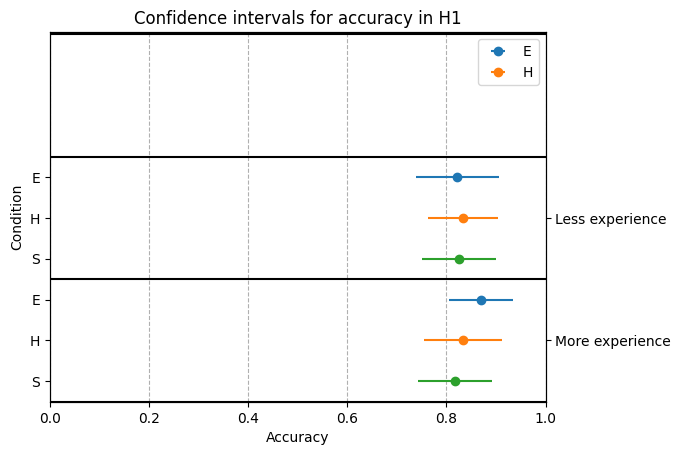

In [166]:
colors = ["tab:blue", "tab:orange", "tab:green"][::-1]
fig, ax = plt.subplots()
error_plots = list()
for i,(mean, low, high) in enumerate(means):
    
    err = ax.errorbar(mean, [i/10], xerr=[abs(low - mean)], fmt='o',color=colors[i%3])
    error_plots.append(err)

xmin = 0.0
xmax = 1
ax.set_xlim(xmin, xmax)
ax.legend(error_plots[:3:-1],["E", "H", "S"],loc="upper right")

print(labels)
ax.set_yticks([i / 10 for i in range(6)], labels=labels)
ax.set_ylim(-0.05, 8/10 + 0.055)
ax.hlines([0-0.05, 0.25, (5/10 + 0.05), 8/10 + 0.05], xmin, xmax, colors="black")
ax.grid(True,axis='x',linestyle='--')

ax.set_xlabel("Accuracy")
ax.set_ylabel("Condition")
ax.set_title("Confidence intervals for accuracy in H1")

ax2 = ax.twinx()
ax2.set_ylim(-0.05, 8/10 + 0.055)
ax2.set_yticks([i / 10 for i in range(1,6,3)], ["More experience", "Less experience"])

# fig.savefig("figures/H1vis_acc.pdf")

In [167]:
results = list()
for index, row in low_exp.iterrows():
    results.append([row["E"], "L"])
for index, row in high_exp.iterrows():
    results.append([row['E'], "H"])

dat = pd.DataFrame(results, columns=["vals", "group"])
dat.to_csv("hypotheses/experience-E.csv", index=False)

# D["less_H"] = low_exp['H']
# D["more_H"] = high_exp['H']
# D["less_S"] = low_exp['S']
# D["more_S"] = high_exp['S']


In [168]:
low_exp

,E,H,S
p_325,0.944444,0.833333,1.000000
p_330,0.944444,1.000000,1.000000
p_335,1.000000,1.000000,0.944444
p_336,0.833333,1.000000,0.944444
p_339,0.611111,0.555556,0.777778
p_341,1.000000,1.000000,0.833333
p_342,0.833333,0.722222,0.777778
p_350,0.833333,0.944444,0.944444
p_358,0.666667,0.833333,0.777778
p_359,0.944444,0.833333,0.944444
